## Use PyTorch autograd and gradient descent for linear regression
* create a synthetic dataset with 100 data points

In [ ]:
import torch as pt
pt.manual_seed(0)

X = pt.linspace(-5, 5, 100)
y = 2 * X + pt.normal(0., 3., [len(X)])

## Render a scatter plot of the sample data
* remember to import `matplotlib.pyplot as plt` and set `%matplotlib inline`

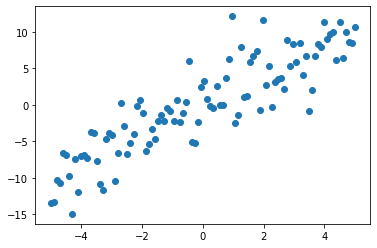

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y);

## Initialize the model parameter
* **hint:** don't forget to set `requires_grad = True`

In [ ]:
w = pt.randn(1, requires_grad = True)
w

tensor([1.3232], requires_grad=True)

## Implement a `forward` method that returns the predicted values

In [ ]:
def forward(w, X):
    return w * X

## Implement a `loss` method that returns the mean squared error
* **hint:** use the `pt.mean` method

In [ ]:
def loss(y_pred, y):
    return pt.mean((y_pred - y) ** 2)

In [ ]:
LEARNING_RATE = 0.03

for _ in range(10):
    y_pred = forward(w, X)
    mse = loss(y_pred, y)
    
    w.grad = None
    mse.backward(pt.tensor(1.))
    
    w.data -= (LEARNING_RATE * w.grad)
    
    print("MSE: ", mse.item(), " w: ", w.item(), " w.grad: ", w.grad.item())

MSE:  13.342745780944824  w:  1.6680289506912231  w.grad:  -11.494243621826172
MSE:  10.390113830566406  w:  1.8369594812393188  w.grad:  -5.63101863861084
MSE:  9.68148136138916  w:  1.9197183847427368  w.grad:  -2.7586312294006348
MSE:  9.511408805847168  w:  1.9602619409561157  w.grad:  -1.3514517545700073
MSE:  9.470590591430664  w:  1.9801242351531982  w.grad:  -0.6620747447013855
MSE:  9.460793495178223  w:  1.9898546934127808  w.grad:  -0.3243488073348999
MSE:  9.458442687988281  w:  1.9946216344833374  w.grad:  -0.15889863669872284
MSE:  9.457878112792969  w:  1.9969569444656372  w.grad:  -0.07784421741962433
MSE:  9.457742691040039  w:  1.998100996017456  w.grad:  -0.03813638538122177
MSE:  9.457711219787598  w:  1.9986615180969238  w.grad:  -0.018683448433876038


## Render a plot of the sample data with a line based on your model parameter
* use `detach().numpy()` on the tensor generated by your model to render it
* **hint:** reuse your `forward` function to generate the values for the line plot


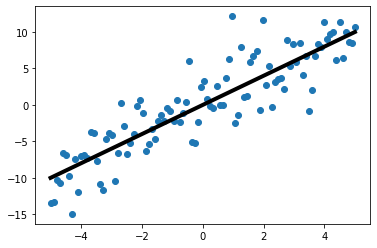

In [ ]:
plt.scatter(X, y)

y_pred = forward(w, X).detach().numpy()
plt.plot(X, y_pred, color='black', linewidth = 4);

Copyright 2021 CounterFactual.AI LLC. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.